In [1]:
%config Completer.use_jedi=False

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, plot_roc_curve, classification_report
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r'C:\Users\SWRAJ KANT SHARMA\Documents\Datasets\Logistic Regession\Credit Card Fraud\creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
# 0 Normal Transaction
# 1 Fraud Transaction

legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [9]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [10]:
# Statistical Measure of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [13]:
# Undersampling
# Build a sample dataset containing the similar distribution of the normal transactions and Fraudulent Transactions

legit_sample = legit.sample(n=492)

In [14]:
# concatenating 2 dataset
new_df= pd.concat([legit_sample, fraud], axis = 0)

In [15]:
new_df.shape

(984, 31)

In [16]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
273067,165406.0,-2.719185,2.518604,-0.615858,0.993544,-0.492136,-1.066387,0.423536,0.818856,-0.726838,...,0.185151,0.247977,-0.319265,0.392494,1.155165,-0.252700,-0.793557,0.029284,25.28,0
88092,61982.0,1.232993,0.236324,0.483000,1.144608,-0.497147,-0.855437,-0.022509,-0.138370,0.243223,...,0.156718,0.501300,-0.151012,0.386926,0.699002,-0.205826,0.021989,0.020839,3.20,0
142093,84576.0,1.246849,-0.383907,0.898373,-0.721547,-1.251039,-0.833794,-0.605660,-0.005309,1.895362,...,-0.018268,0.173542,-0.030464,0.390655,0.484424,-0.684630,0.090463,0.034199,1.00,0
147783,88985.0,1.988522,-0.331978,-0.415200,0.381014,-0.392058,-0.099673,-0.563787,-0.037198,1.264108,...,0.197394,0.846689,0.121696,0.722913,-0.018571,-0.246748,0.044710,-0.027042,12.99,0
73274,55064.0,1.192438,-1.619634,0.523558,-1.451781,-1.605019,0.212331,-1.307795,0.161638,-1.776657,...,0.067647,0.300113,-0.128538,-0.310612,0.218627,-0.082879,0.037114,0.031281,138.00,0


In [17]:
new_df['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [18]:
# Mean of each column is still approx. same which means sample are still same

new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94098.943089,-0.042008,-0.091751,-0.040947,-0.101134,0.046712,-0.074967,-0.046030,-0.027963,-0.004636,...,-0.117702,-0.032757,0.043055,0.065411,-0.003245,0.064887,-0.009113,-0.006793,-0.022416,71.932724
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [19]:
# Splitting the data into features & target
X = new_df.drop(columns = 'Class', axis=1)
Y = new_df['Class']

In [20]:
X.shape

(984, 30)

In [21]:
Y.shape

(984,)

In [22]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [23]:
model_lr = LogisticRegression(max_iter=120,random_state=0, n_jobs=20, solver='liblinear')

In [24]:
model_lr.fit(X_train, y_train)

C:\Users\SWRAJ KANT SHARMA\.conda\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\_logistic.py:1357: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 20.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(max_iter=120, n_jobs=20, random_state=0, solver='liblinear')

In [25]:
trn_lr_pred = model_lr.predict(X_train)
trn_lr_acc = accuracy_score(trn_lr_pred, y_train)
print(round(trn_lr_acc*100, 2))

93.63


In [26]:
tst_lr_pred = model_lr.predict(X_test)
tst_lr_acc = accuracy_score(tst_lr_pred, y_test)
print(round(tst_lr_acc*100, 2))

92.62


<AxesSubplot:>

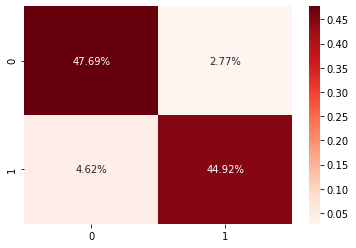

In [27]:
cm1 = confusion_matrix(y_test, tst_lr_pred)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

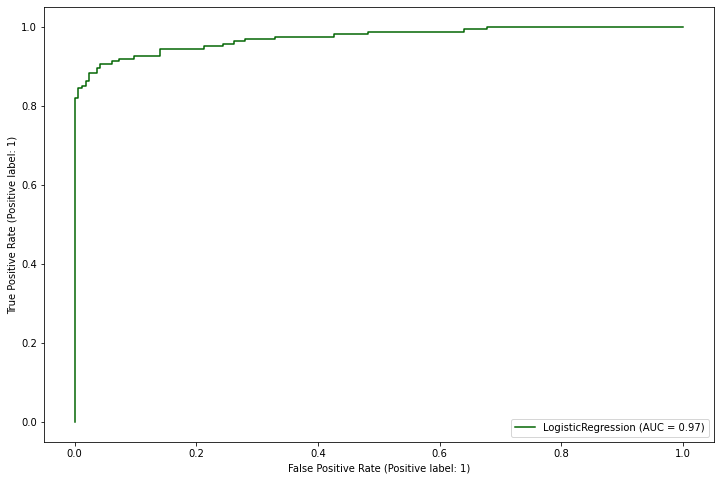

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))
plot_roc_curve(model_lr, X_test, y_test, color='darkgreen', ax=ax)

In [29]:
print(classification_report(y_test,tst_lr_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       164
           1       0.94      0.91      0.92       161

    accuracy                           0.93       325
   macro avg       0.93      0.93      0.93       325
weighted avg       0.93      0.93      0.93       325

